In [2]:
from scipy.integrate import solve_ivp

In [3]:
def plasma(t,z,a,b,c,d):
    x, y, n = z
    return [n*y, x*(1-n),-x*y*n/(a*b*n**(b-1)+c/2-(d**2/n**2))]

In [6]:
sol = solve_ivp(plasma,[0,4],[0,0.412,1.42], args=(0.5, 5/3, 0.5, 0.1), rtol = 1e-14,atol = 1e-14)

In [4]:
import numpy as np


In [7]:
jy = sol.y[1]*sol.y[2]

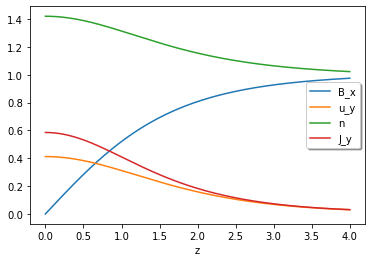

In [8]:
>>> t = sol.t
>>> z = sol.y

>>> import matplotlib.pyplot as plt
>>> plt.plot(t, z.T)
plt.plot(t,jy)
plt.xlabel('z')
>>> plt.legend(['B_x', 'u_y','n','J_y'], shadow=True)
>>> plt.show()

In [9]:
Bx = sol.y[0]
uy = sol.y[1]
n = sol.y[2]


$n (\vec{u}\cdot \vec{\nabla})\vec{u} + \dfrac{\vec{\nabla}{p}}{2} = n(\vec{E} + \vec{u}\times \vec{B})$ - equation of motion 



$p =\dfrac{ n^{\gamma} \beta_i}{2} ; \gamma = 5/3, \beta_i = 1$

Данные, которые нам даны: 

$\\
B_x(z) $

$ u_y(z) $ 

$\\
n(z)$

$\beta_i = 1$ 

$\\
\beta_e  = 0.5$

$B_z = 0.1$

$\\ \gamma = 5/3 $

In [10]:
Bx = sol.y[0]
uy = sol.y[1]
n = sol.y[2]
beta_i = 1
beta_e = 0.5
Bz = 0.1
gamma = 5/3


Тензор натяжений:
$$ A_{ik} = \dfrac{p}{2}\delta_{ik} + nu_iu_k $$

Изначальный базис выглядит следующим образом: $$
\begin{pmatrix}
\vec{e}_x \\
\vec{e}_y \\
\vec{e}_z
\end{pmatrix} $$

Базис магнитного поля: 
$$
\begin{pmatrix}
\vec{e}_\gamma \\
\vec{e}_y \\
\dfrac{\vec{B}}{B}
\end{pmatrix} $$

где $\vec{e}_\gamma \perp \dfrac{\vec{B}}{B}$ и $\vec{e}_\gamma \perp \vec{e}_y$

Тогда найдем преобразование базиса:

$$
\begin{pmatrix}
\vec{e}_x \\
\vec{e}_y \\
\vec{e}_z
\end{pmatrix} \longmapsto
\begin{pmatrix}
\vec{e}_\gamma \\
\vec{e}_y \\
\dfrac{\vec{B}}{B}
\end{pmatrix}$$ 

$$
\begin{pmatrix}
\vec{e}_\gamma \\
\vec{e}_y \\
\dfrac{\vec{B}}{B}
\end{pmatrix} = \hat{\cal {O}} \begin{pmatrix}
\vec{e}_x \\
\vec{e}_y \\
\vec{e}_z
\end{pmatrix} $$ 

где $\hat{\cal {O}}$ - матрица поворота 

Найдем ее:
$$ \begin{cases}
\vec{e}_\gamma = \dfrac{B_z}{\sqrt{B_x^2+B_z^2}} \  \vec{e}_x + 0\cdot \vec{e}_y - \dfrac{B_x(z)}{\sqrt{B_x^2+B_z^2}} \ \vec{e}_z \\ 
\vec{e}_y = 0\cdot \vec{e}_x + 1\cdot \vec{e}_y + 0\cdot \vec{e}_z \\
\\
\dfrac{\vec{B}}{B} = \dfrac{B_x(z)}{\sqrt{B_x^2+B_z^2}} \  \vec{e}_x + 0\cdot \vec{e}_y + \dfrac{B_z}{\sqrt{B_x^2+B_z^2}} \ \vec{e}_z \\ 
\end{cases} \Longrightarrow \hat{\cal {O}} = 
\begin{pmatrix}
\cos{\alpha} & 0 & \sin{\alpha}\\
0 & 1 & 0\\
-\sin{\alpha} & 0 & \cos{\alpha}
\end{pmatrix}
$$

где:
$$ \cos{\alpha} = \dfrac{B_z}{\sqrt{B_x^2+B_z^2}} $$
$$\\ \sin{\alpha} =- \dfrac{B_x}{\sqrt{B_x^2+B_z^2}} $$

Тогда, зная преобразование базиса, можем написать, как преобразуется нас тензор натяжений: 

$$A_B = \hat{\cal {O}}\ A\ \hat{\cal {O}}^T $$

Через исходные данные надо найти следующие величины: 
$ p \\
u_z \\
u_x $


$$\begin{equation}
p_\alpha = C_\alpha n_\alpha^\gamma  = 2^\gamma \beta_1 \left(\dfrac{n}{2}\right)^\gamma = n^\gamma \dfrac{\beta_i}{2} = p_1 = p_2
\end{equation}$$

$$
\begin{cases}
u_{1 z} = \dfrac{\Gamma_1}{n_1} = \dfrac{-B_z}{n}\\
\\
u_{2 z} = \dfrac{\Gamma_2}{n_2} = \dfrac{B_z}{n}
\end{cases}
$$

\begin{cases}
u_{1 x} = -B_x\\
\\
u_{2 x} = B_x \\
\end{cases}

Будем решать задачу для протонов $\alpha = 1$


In [11]:
p1 = n**(5/3) * beta_i / 2
u1x = - Bx
u1z = -Bz / n
u1y = uy


Введем наш тензор натяжений

In [12]:
stress_tensor1 = np.ones((Bx.shape[0],3,3)) # Bx.shape[0] - задает размерность по z. А сам тензор у нас 3 х 3
stress_tensor1[:,0,0] = p1/2 #+ n*u1x**2
stress_tensor1[:,0,1] = n*u1x*u1y
stress_tensor1[:,0,2] = n*u1x*u1z
stress_tensor1[:,1,0] = n*u1x*u1y
stress_tensor1[:,1,1] = p1/2 #+ n*u1y**2
stress_tensor1[:,1,2] = n*u1y*u1z
stress_tensor1[:,2,0] = n*u1x*u1z
stress_tensor1[:,2,1] = n*u1y*u1z
stress_tensor1[:,2,2] = p1/2 # + n*u1z**2

Введем матрицу поворота

In [28]:
cosa = Bz / np.sqrt(Bz**2 + Bx**2)
sina = -Bx / np.sqrt(Bz**2 + Bx**2)
rotation_matrix = np.ones((Bx.shape[0],3,3))
rotation_matrix[:,0,0] = cosa
rotation_matrix[:,0,1] = 0
rotation_matrix[:,0,2] = sina 
rotation_matrix[:,1,0] = 0
rotation_matrix[:,1,1] = 1
rotation_matrix[:,1,2] = 0
rotation_matrix[:,2,0] = -sina
rotation_matrix[:,2,1] = 0
rotation_matrix[:,2,2] = cosa
rotation_matrix_inv = [np.linalg.inv(rotation_matrix[i]) for i in range(Bx.shape[0])]

In [29]:
stress_tensor_new = rotation_matrix @ stress_tensor1 @ rotation_matrix_inv

Получили новый тензор натяжений уже в нужном базисе

Теперь будем смотреть на диагональные элементы: 
$$
\hat{A}_B = 
\begin{pmatrix}
p_{\perp 1} & A_{12} & A_{13}\\
A_{21} & p_{\perp 2} & A_{23}\\
A_{31} & A_{32} & p_{||}
\end{pmatrix}
$$

Тогда искомая величина выражается: 
$$\Lambda = \dfrac{1}{4} \dfrac{\left(2p_{||} - p_{\perp 1} - p_{\perp 2}\right)}{B_x^2+B_z^2} $$

In [30]:
p_perp1 = stress_tensor_new[:,0,0]
p_perp2 = stress_tensor_new[:,1,1]
p_paral = stress_tensor_new[:,2,2]

In [31]:
lamb = 1/4 * (2*p_paral - p_perp1 - p_perp2) / (Bx**2+Bz**2)

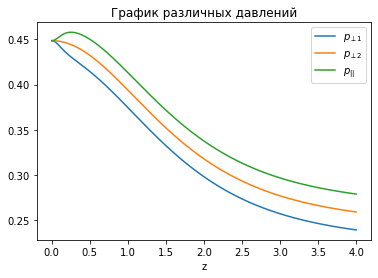

In [32]:
plt.plot(t,p_perp1)
plt.plot(t,p_perp2)
plt.plot(t,p_paral)
plt.xlabel('z')
plt.legend(['$p_{\perp1}$','$p_{\perp2}$','$p_{||}$'])
plt.title('График различных давлений')
plt.show()

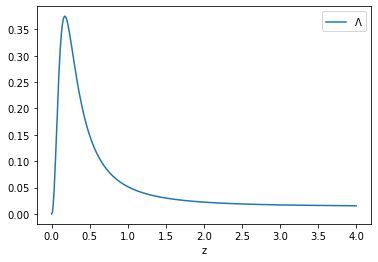

In [33]:
plt.plot(t,lamb)
plt.xlabel('z')
plt.legend(['$\Lambda$'])
plt.show()